In [1]:
import pandas as pd

df = pd.DataFrame({"test": [1,3,4,5,6], 'type': ['up', 'up', 'down', 'up', 'down'], 'until_now': ['down', 'up', 'down', 'up', 'down']}, index=pd.date_range("2020-01-01", "2020-01-05"))

print(df)

print("________________")

print(df.shift(-1))


# row = df.iloc[3]
# print(row)

# print(row.shift(-1))

# print(df.iloc[1].shift())

# print(df)

# print("________")

# print(df.test.shift())

            test  type until_now
2020-01-01     1    up      down
2020-01-02     3    up        up
2020-01-03     4  down      down
2020-01-04     5    up        up
2020-01-05     6  down      down
________________
            test  type until_now
2020-01-01   3.0    up        up
2020-01-02   4.0  down      down
2020-01-03   5.0    up        up
2020-01-04   6.0  down      down
2020-01-05   NaN   NaN       NaN


In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
     np.random.randn(50, 3),
     columns=["a", "b", "c"])

print(df)

           a         b         c
0   2.646900 -0.395253  0.372634
1  -0.679873  0.386484  0.312349
2   0.238577 -0.682441 -0.355223
3  -0.108686  0.861535  0.807727
4   0.818846 -0.859113 -1.010072
5  -0.378909  0.005971 -0.452981
6  -0.840213  0.087476 -0.319353
7  -0.749866  0.273001 -0.740114
8  -0.447087 -1.288475  0.129909
9  -0.795422  0.609262  0.785329
10 -1.434404 -1.000891  0.173304
11 -1.747039  0.495883 -0.378727
12  0.874279  1.240055 -0.213261
13 -0.208309  0.432294 -1.423411
14 -0.738747  0.953140  0.029203
15 -0.615301  0.779374 -0.335232
16  0.649733  0.490438 -1.027973
17 -0.587504 -0.959805 -0.345923
18  0.725027  0.953806 -0.395841
19 -1.117589  0.345728  1.688664
20  0.770881  1.244736 -0.893232
21 -0.111999 -1.516896  0.453137
22 -0.712143  0.225699 -0.047739
23 -0.705396  0.593621 -1.846373
24 -1.058965 -0.542913 -0.789018
25  0.142135  1.263317  1.024595
26  0.009817  0.747585 -0.081076
27 -1.751208 -0.801402 -0.556263
28  0.603189 -0.701350  0.937470
29  1.0339

In [5]:
from sklearn.metrics import matthews_corrcoef

y_true = ['up', 'up', 'down', 'up']
y_pred = ['down', 'down', 'up', 'down']


a = matthews_corrcoef(y_true, y_pred)

print(a)

-1.0


In [9]:
import pandas as pd

df = pd.DataFrame({"test": [1,3,4,5,6], 'type': ['up', 'up', 'down', 'up', 'down'], 'until_now': ['down', 'up', 'down', 'up', 'down']}, index=pd.date_range("2020-01-01", "2020-01-05"))

print(df['type'].to_list())

['up', 'up', 'down', 'up', 'down']


In [3]:
import pandas as pd

df = pd.DataFrame({"test": [1,3,4,5,6], 'type': ['up', 'up', 'down', 'up', 'down'], 'until_now': ['down', 'up', 'down', 'up', 'down']}, index=pd.date_range("2020-01-01", "2020-01-05"))

bach = "bach"

# exec()

print(df['type'].to_list())


['up', 'up', 'down', 'up', 'down']


In [ ]:
day_list = unique_list(data_prices['day'].tolist())
highest_hour_list = []
highest_return_list = []
for day in day_list:
max_value = data_prices[data_prices['day'] == day].hour_return.max()
min_value = data_prices[data_prices['day'] == day].hour_return.min()

highest_return = max_value if max_value > abs(min_value) else min_value
highest_return_list.append(highest_return)
highest_hour_list.append(data_prices[data_prices['hour_return'] == highest_return].hour.values[0])

data = {
    'highest_in_day': highest_hour_list,
    'highest_return': highest_return_list
}

df = pd.DataFrame(data, index=day_list)

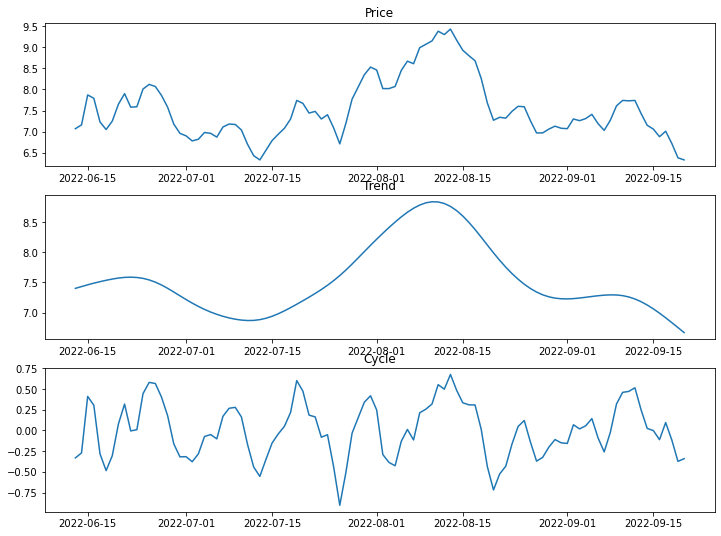

Test RMSE: 0.26738


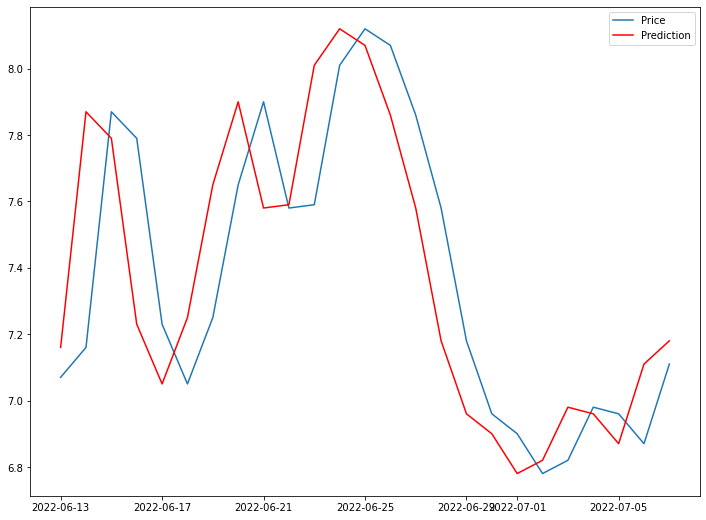

In [18]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import seaborn as sns



%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('DOTUSDT')
candlestick = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
data_prices = candlestick.to_df()

data_prices['average_prices'] = data_prices.apply(
    lambda x: round((x['open'] + x['close'] + x['high'] + x['low'])/4, 2), axis=1)

plt.rcParams['figure.figsize'] = [12, 9]
series = data_prices['average_prices']
cycle, trend = sm.tsa.filters.hpfilter(series, 500)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()


predictions = series.shift(1).dropna()
test_score = np.sqrt(mean_squared_error(series[int(len(series) * 0.7)+1:], predictions.iloc[int(len(series) * 0.7):]))
print('Test RMSE: %.5f' % test_score)
plt.plot(series.iloc[-25:], label='Price')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()

# print(data_prices)

# result = seasonal_decompose(data_prices.average_prices, model='additive', freq=1)
# result.plot()
# plt.show()

In [10]:
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame({"data_minu": ['30/10 09:00','30/10 09:05','30/10,09:10','30/10 09:15','30/10 09:20','30/10 09:25','30/10 09:30','30/10 09:35','30/10 09:40','30/10 09:45'],
                   "Open":['10','17','23','20','8','22','24','25','29','22'],
                   "High":['21','27','25','29','24','27','28','32','29','25'],
                   "Low":['6','12','18','9','5','8','24','18','15','10'],
                   "Close":['17','24','22','10','21','25','26','30','18','10']})     

tickvals =[k*0.5 for k in range(len(df))]
ticktext=list(df["data_minu"])
fig = go.Figure(data=[go.Candlestick(x=tickvals, #df['data_minu'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])  

fig.update_layout(xaxis_rangeslider_visible=False, xaxis_tickvals=tickvals, xaxis_ticktext=ticktext) 

fig.add_shape(dict(type='rect',
                    xref='x', yref='y',
                    layer='below', 
                    x0 = tickvals[1] -0.2, y0 = float(df.loc[1, 'Low'])-1,
                    x1 = tickvals[2] +0.2, y1 = float(df.loc[1, 'High'])+1,
                    fillcolor='orange', #'RoyalBlue',
                    opacity=0.35))

fig.show()

print(dict(type='rect',
                    xref='x', yref='y',
                    layer='below', 
                    x0 = tickvals[1]-0.2, y0 = float(df.loc[1, 'Low'])-1,
                    x1 = tickvals[1]+0.2, y1 = float(df.loc[1, 'High'])+1,
                    fillcolor='orange', #'RoyalBlue',
                    opacity=0.35))

{'type': 'rect', 'xref': 'x', 'yref': 'y', 'layer': 'below', 'x0': 0.3, 'y0': 11.0, 'x1': 0.7, 'y1': 28.0, 'fillcolor': 'orange', 'opacity': 0.35}


In [14]:
fund = 2000
leverage = 20
win_streak = 2

fund_after_leverage = fund*leverage
borrow = fund_after_leverage - fund

for i in range(win_streak):
    print(i + 1)
    fund = fund_after_leverage*101/100 - borrow
    fund_after_leverage = fund*leverage
    borrow = fund_after_leverage - fund

print(fund)


1
2
2880.0
